In [1]:
import pandas as pd
import json
from pandas.io.json import json_normalize #package for flattening json in pandas df
from PIL import Image

import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import sem
from scipy.stats import t
import statistics
import math


In [2]:
info_car2PPO_episode_1  = pd.read_json ('/home/aizaz/Desktop/PhD-20210325T090933Z-001/PhD/1_March_2023/Journal_Paper/examples/pre_IRL_anaylysis_three_way/IRL_pretest_result_three_way.json', lines=True)


In [3]:
info_car2PPO_episode_1['reward']

0       -6.986200
1       -7.088917
2       -7.058652
3       -7.047170
4       -6.926137
           ...   
29995   -1.076078
29996   -1.079061
29997   -1.554006
29998   -1.581437
29999   -1.541700
Name: reward, Length: 30000, dtype: float64

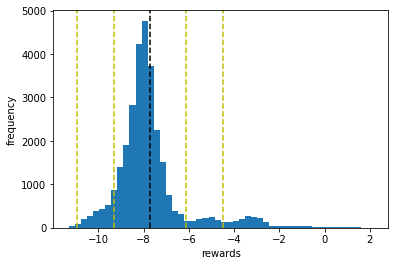

In [4]:
plt.hist(info_car2PPO_episode_1['reward'],bins=50,histtype='stepfilled')
plt.xlabel('rewards')
plt.ylabel('frequency')
m = statistics.mean(info_car2PPO_episode_1['reward'])
sd = statistics.stdev(info_car2PPO_episode_1['reward'])

plt.axvline(m, color='k', linestyle='dashed')
plt.axvline(m+sd, color='y', linestyle='dashed')
plt.axvline(m-sd, color='y', linestyle='dashed')

plt.axvline(m + 2*sd, color='y', linestyle='dashed')
plt.axvline(m - 2*sd, color='y', linestyle='dashed')

plt.show()

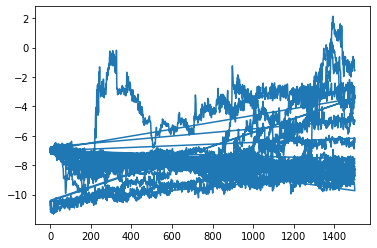

In [5]:
plt.plot(info_car2PPO_episode_1['state'], info_car2PPO_episode_1['reward'])


In [6]:
myMean = info_car2PPO_episode_1['reward'].mean()
myMean

-7.716020636038001

In [7]:
SE = sem(info_car2PPO_episode_1['reward'])
SE

0.009262134274024685

In [8]:
confLevel = 0.95

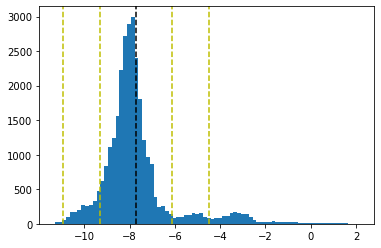

In [9]:
plt.hist(info_car2PPO_episode_1['reward'],bins=80)

m = statistics.mean(info_car2PPO_episode_1['reward'])
sd = statistics.stdev(info_car2PPO_episode_1['reward'])

plt.axvline(m, color='k', linestyle='dashed')
plt.axvline(m+sd, color='y', linestyle='dashed')
plt.axvline(m-sd, color='y', linestyle='dashed')

plt.axvline(m + 2*sd, color='y', linestyle='dashed')
plt.axvline(m - 2*sd, color='y', linestyle='dashed')
Confidence_interval = sd/math.sqrt(3982)
Confidence_interval = Confidence_interval*1.960


plt.show()

In [10]:
print ("Mean : ", m)
print ("Std Deviation : ", sd)
print ("1st Std Interval : ", m-sd , m+sd )
print ("2nd Std Interval : ", m - 2*sd , m + 2*sd )
print ("Confidence Interval : ", Confidence_interval)

print ("Confidence Interval : ", m - Confidence_interval , m + Confidence_interval)


Mean :  -7.716020636038
Std Deviation :  1.6042487149135831
1st Std Interval :  -9.320269350951584 -6.111771921124417
2nd Std Interval :  -10.924518065865167 -4.507523206210834
Confidence Interval :  0.049828423115540636
Confidence Interval :  -7.765849059153541 -7.66619221292246


In [11]:
t.interval(0.65,info_car2PPO_episode_1['reward'],loc=m, scale=sd)


(array([nan, nan, nan, ..., nan, nan, nan]),
 array([nan, nan, nan, ..., nan, nan, nan]))

<AxesSubplot:xlabel='reward', ylabel='Density'>

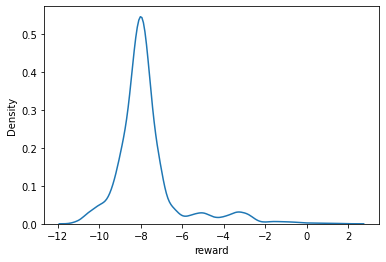

In [12]:
sns.kdeplot(info_car2PPO_episode_1['reward'],)


<AxesSubplot:xlabel='state', ylabel='Density'>

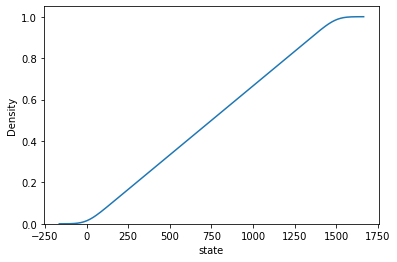

In [13]:
sns.kdeplot(
    data=info_car2PPO_episode_1['reward'], x=info_car2PPO_episode_1['state'],
    cumulative=True, common_norm=False, common_grid=True,
)

<AxesSubplot:xlabel='state', ylabel='reward'>

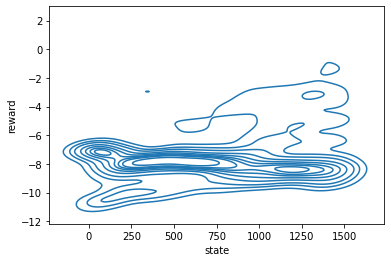

In [14]:
geyser = sns.load_dataset("geyser")
sns.kdeplot(data=info_car2PPO_episode_1, x="state", y="reward")

<AxesSubplot:xlabel='state', ylabel='reward'>

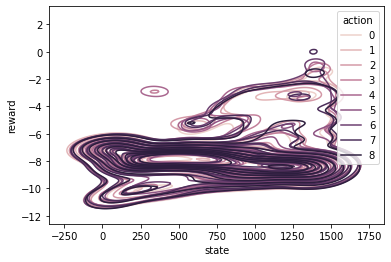

In [15]:
sns.kdeplot(data=info_car2PPO_episode_1, x="state", y="reward", hue="action"
)


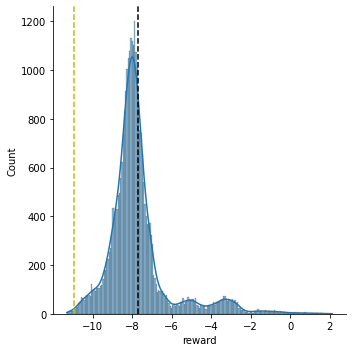

In [21]:
sns.displot(data=info_car2PPO_episode_1, x="reward", kde=True) #log_scale=True)
plt.axvline(m, color='k', linestyle='dashed')
# plt.axvline(m+sd, color='y', linestyle='dashed')
# plt.axvline(m-sd, color='y', linestyle='dashed')

# plt.axvline(m + 2*sd, color='y', linestyle='dashed')
plt.axvline(m - 2*sd, color='y', linestyle='dashed')

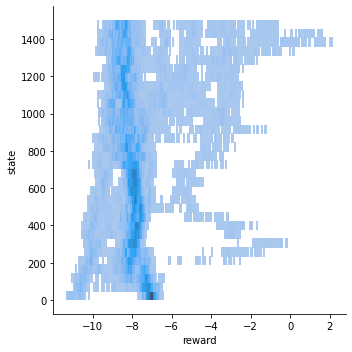

In [26]:
sns.displot(data=info_car2PPO_episode_1, x="reward", y="state", )


<AxesSubplot:xlabel='reward', ylabel='state'>

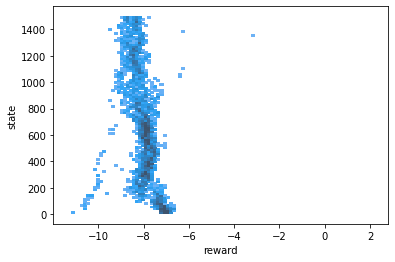

In [68]:
sns.histplot(
    info_car2PPO_episode_1, x="reward", y="state",
    bins=100 ,
    pthresh=.3, pmax=.95,
)

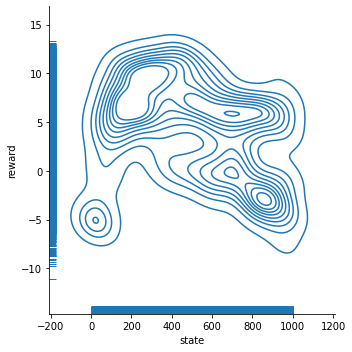

In [19]:
g = sns.displot(data=info_car2PPO_episode_1, x="state", y="reward", kind="kde", rug=True)


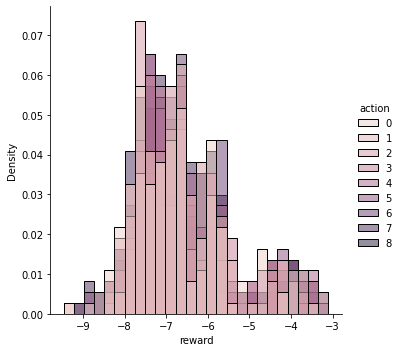

In [17]:

sns.displot(info_car2PPO_episode_1, x="reward", hue="action", stat="density")


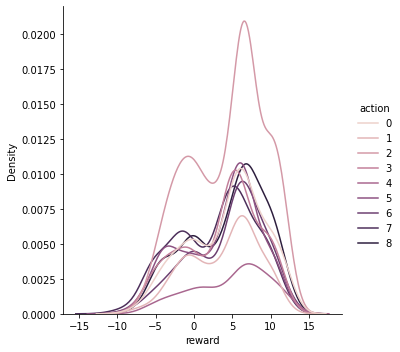

In [21]:
sns.displot(info_car2PPO_episode_1, x="reward", hue="action", kind="kde")


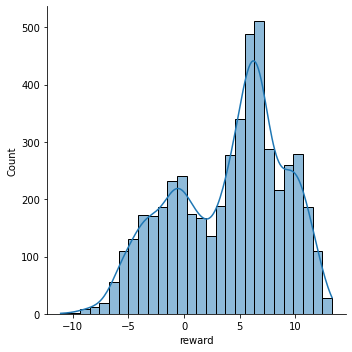

In [22]:
sns.displot(info_car2PPO_episode_1, x="reward", kde=True)


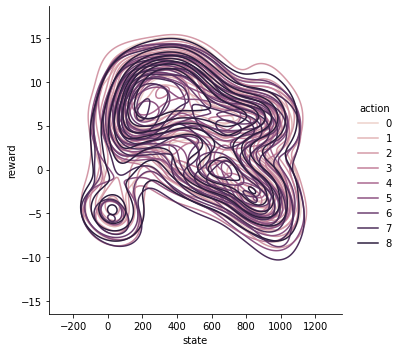

In [23]:
sns.displot(info_car2PPO_episode_1, x="state", y="reward", hue="action", kind="kde")


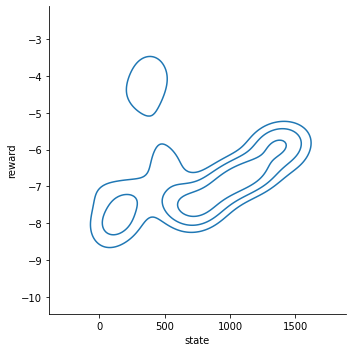

In [18]:
sns.displot(info_car2PPO_episode_1, x="state", y="reward", kind="kde", thresh=.2, levels=4)


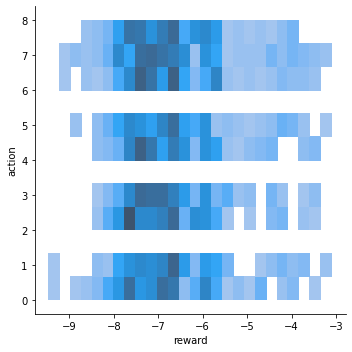

In [19]:
sns.displot(info_car2PPO_episode_1, x="reward", y="action", )


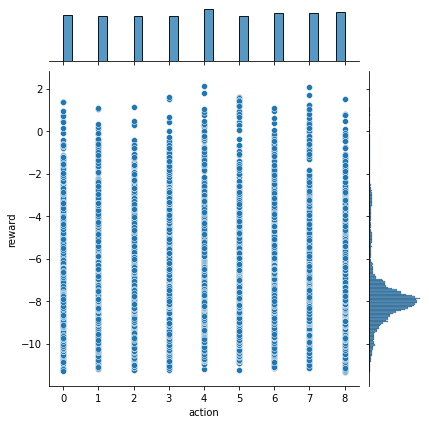

In [16]:
sns.jointplot(data=info_car2PPO_episode_1, x="action", y="reward")


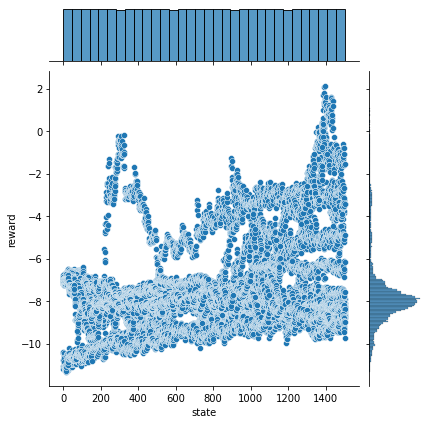

In [17]:
sns.jointplot(data=info_car2PPO_episode_1, x="state", y="reward")


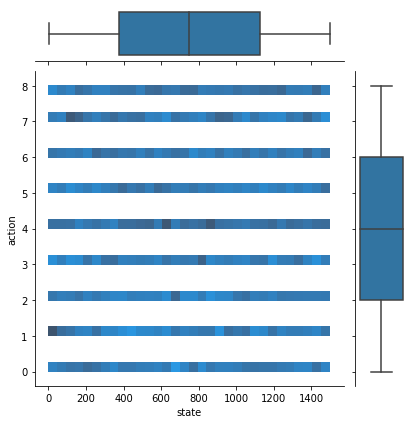

In [18]:
g = sns.JointGrid(data=info_car2PPO_episode_1, x="state", y="action")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

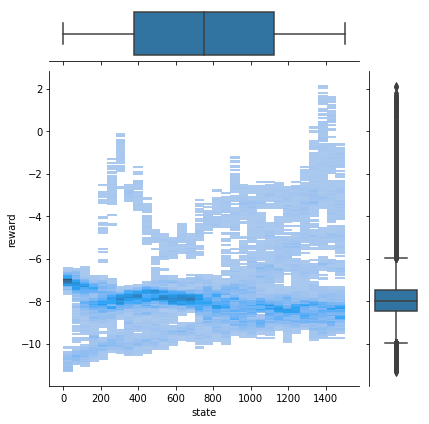

In [19]:
g = sns.JointGrid(data=info_car2PPO_episode_1, x="state", y="reward")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

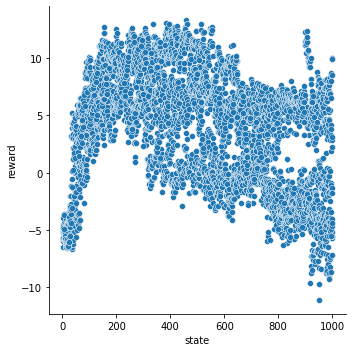

In [31]:
sns.relplot(data=info_car2PPO_episode_1, x="state", y="reward")
# sns.rugplot(data=info_car2PPO_episode_1, x="bill_length_mm", y="bill_depth_mm")

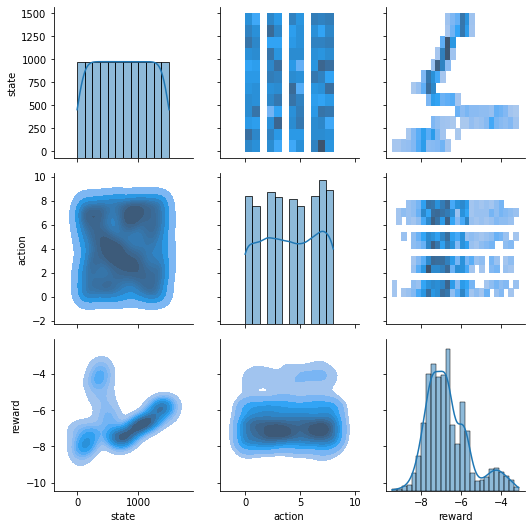

In [24]:
g = sns.PairGrid(info_car2PPO_episode_1)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

/home/aizaz/anaconda3/envs/MAD-ARL/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='reward'>

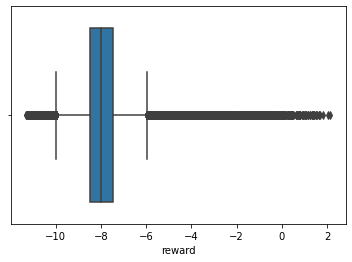

In [20]:
sns.boxplot(info_car2PPO_episode_1['reward'])


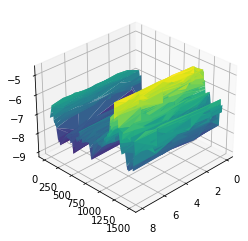

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
 
# Get the data (csv file is hosted on the web)
url = 'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/volcano.csv'
data = pd.read_csv(url)
 
# Transform it to a long format
df=data.unstack().reset_index()
df.columns=["X","Y","Z"]
 

 
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(30, 45)

ax.plot_trisurf(info_car2PPO_episode_1['action'], info_car2PPO_episode_1['state'], info_car2PPO_episode_1['reward'], cmap=plt.cm.viridis, linewidth=0.2)
plt.show()
 


In [13]:
# Episode 1

info_car1 = pd.read_json ('/home/aizaz/Desktop/PhD-20210325T090933Z-001/PhD/1_March_2023/Journal_Paper/examples/pre_IRL_anaylysis_three_way/info_car1.json', lines=True)
info_car1 = pd.concat([info_car1.drop(['control'], axis=1), info_car1['control'].apply(pd.Series)], axis=1)
info_car2 = pd.read_json ('/home/aizaz/Desktop/PhD-20210325T090933Z-001/PhD/1_March_2023/Journal_Paper/examples/pre_IRL_anaylysis_three_way/info_car2.json', lines=True)
info_car2 = pd.concat([info_car2.drop(['control'], axis=1), info_car2['control'].apply(pd.Series)], axis=1)
info_car3 = pd.read_json ('/home/aizaz/Desktop/PhD-20210325T090933Z-001/PhD/1_March_2023/Journal_Paper/examples/pre_IRL_anaylysis_three_way/info_car3.json', lines=True)
info_car3 = pd.concat([info_car3.drop(['control'], axis=1), info_car3['control'].apply(pd.Series)], axis=1)


In [41]:
info_car1.shape

(30000, 35)

In [6]:
print((info_car3['collision_vehicles']!= 0).values.sum()/30000,"collision_vehicles")
print((info_car3['collision_other']!= 0).values.sum()/30000, "collision_other")
print((info_car3['intersection_offroad'] != 0).values.sum()/30000,"intersection_offroad")
print ((info_car3['intersection_otherlane'] != 0).values.sum()/30000, "intersection_otherlane")


0.0542 collision_vehicles
0.0354 collision_other
0.18876666666666667 intersection_offroad
0.18876666666666667 intersection_otherlane


In [5]:
SE_CO = sem(info_car3['collision_vehicles'] != 0)
print (SE_CO)
SE_CP = sem(info_car3['collision_other'] != 0)
print (SE_CP)
SE_OS = sem(info_car3['intersection_otherlane'] != 0)
print (SE_OS)


0.001307211648284156
0.0010668954691993371
0.0022593429491246935


In [4]:
print (info_car3['collision_vehicles'].idxmax()*0.134)
print (info_car3['collision_other'].idxmax()*0.134)
print (info_car3['intersection_offroad'].idxmax()*0.134)

# 268
# 0.134

1337.722
2899.492
513.354


In [5]:
print (info_car3['collision_vehicles'].idxmax()*0.134)
print (info_car3['collision_other'].idxmax()*0.134)
print (info_car3['intersection_offroad'].idxmax()*0.134)

# 268
# 0.134

1337.722
2899.492
513.354


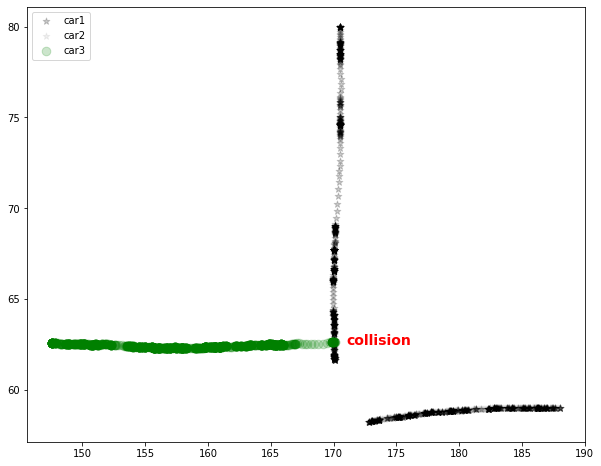

In [170]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111,)

# ax1.scatter(info_car1['x'][:1500], info_car1['y'][:1500], s=10, c='g', marker="s", label='car1')
# ax1.scatter(info_car2['x'][:1500], info_car2['y'][:1500], s=10, c='b', marker="s", label='car2')
# ax1.scatter(info_car3['x'][:1500],info_car3['y'][:1500], s=10, c='r', marker="o", label='car3')

ax1.scatter(info_car1['x'][1501:2100], info_car1['y'][1501:2100], s=50, c='black', marker="*", label='car1',alpha =0.2,)
ax1.scatter(info_car2['x'][1501:3000], info_car2['y'][1501:3000], s=50, c='black', marker="*", label='car2',alpha =0.06,)
ax1.scatter(info_car3['x'][1501:3000],info_car3['y'][1501:3000], s=300, c='green', marker=".", label='car3',alpha =0.2,)


# ax1.scatter(info_car1['x'][4501:6000], info_car1['y'][4501:6000], s=1, c='g', marker="s", label='car1')
# ax1.scatter(info_car2['x'][4501:6000], info_car2['y'][4501:6000], s=10, c='b', marker="s", label='car2')
# ax1.scatter(info_car3['x'][4501:6000],info_car3['y'][4501:6000], s=10, c='r', marker="o", label='car3')


# Text Annotate
plt.text(171, 62.5, "collision", horizontalalignment='left', size='14', color='red', weight='semibold')
# plt.text(2, 4, "gear=5", horizontalalignment='left', size='medium', color='green', weight='semibold')
# plt.text(2, 2, "gear=4", horizontalalignment='left', size='medium', color='red', weight='semibold')




plt.legend(loc='upper left');
plt.show()

In [70]:
mean_speed = []
for chunk in np.array_split(info_car3['forward_speed'], 20):
    mean_speed.append(statistics.mean(chunk))

In [71]:
mean_speed

[0.0946349987846991,
 0.11122696938050193,
 0.06622268299168543,
 0.14274547974400467,
 0.090611231119412,
 0.09899627772470575,
 0.08643421168796281,
 0.05880067646387119,
 0.09969129121872686,
 0.11516512275132708,
 0.08953085379996507,
 0.12309153494726668,
 0.0638849371230372,
 0.07187583217318302,
 0.1959323362284361,
 0.06121540917037312,
 0.08656528240578897,
 0.1214082119469346,
 0.11921914889023072,
 0.09029610729027795]

/home/aizaz/anaconda3/envs/MAD-ARL/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

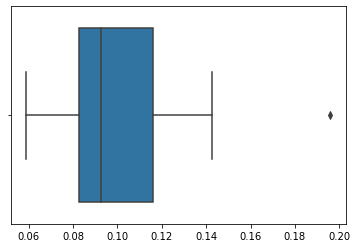

In [72]:
sns.boxplot(mean_speed)


In [74]:
mean_distance = []
for chunk in np.array_split(info_car3['distance_to_goal_euclidean'], 20):
    mean_distance.append(statistics.mean(chunk))

mean_distance

[33.021574637824884,
 33.38381112306988,
 36.11615656792597,
 29.521637429031085,
 33.71179827715107,
 32.79935311762789,
 29.339899028226853,
 35.92795866415033,
 32.269870634613696,
 32.10971125615846,
 33.695703973943516,
 31.39745009494032,
 34.774344653105054,
 34.243310671827565,
 20.170897213901174,
 36.763273245235574,
 35.099085499815395,
 31.574930013257106,
 32.22383992514054,
 32.65632381605173]

/home/aizaz/anaconda3/envs/MAD-ARL/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

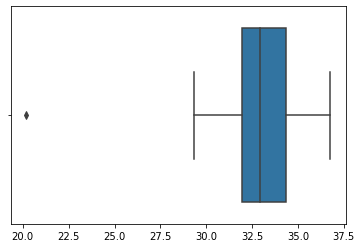

In [75]:
sns.boxplot(mean_distance)


<AxesSubplot:xlabel='x', ylabel='y'>

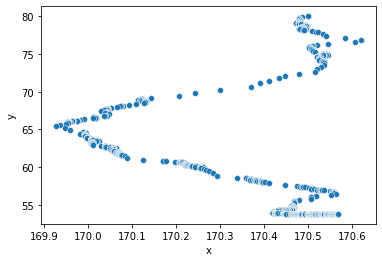

In [71]:
sns.scatterplot(
    data=info_car1[1501:3000], x="x", y="y",
    sizes=(20, 200), hue_norm=(0, 7), legend="full"
)

# ax1.scatter(info_car1['x'][1501:3000], info_car1['y'][1501:3000], s=1, c='g', marker="s", label='car1')
# ax1.scatter(info_car2['x'][1501:3000], info_car2['y'][1501:3000], s=1, c='b', marker="s", label='car2')
# ax1.scatter(info_car3['x'][1501:3000],info_car3['y'][1501:3000], s=50, c='r', marker="o", label='car3')


## Only for Paper Visualization

### RQ1

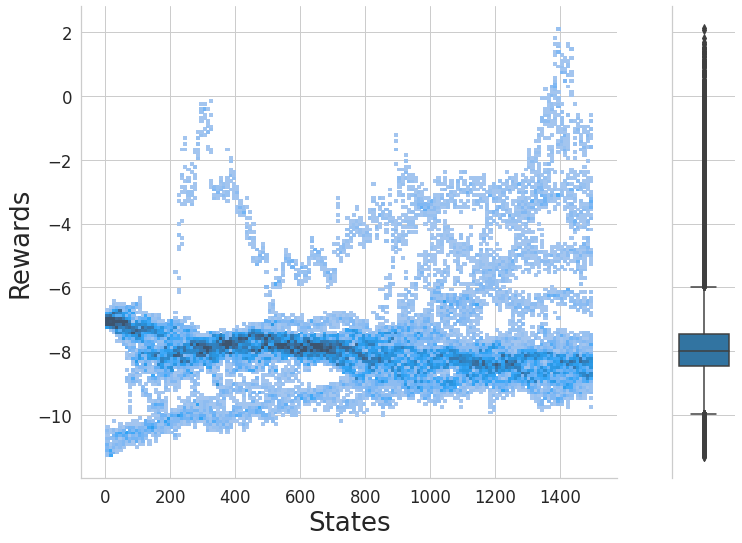

In [8]:
sns.reset_orig()

color = sns.color_palette()

sns.set(font_scale = 1.5)
sns.set_style(rc = {'axes.facecolor': '#FFFFFF'})
sns.set_style("whitegrid")

joint = sns.JointGrid(data=info_car2PPO_episode_1, x="state", y="reward")

joint.plot_joint(sns.histplot,color=color[0],bins=150, pmax=.95,)
joint.plot_marginals(sns.boxplot, 
                     color=color[0])

joint.fig.tight_layout()

# plt.legend(loc='lower right')
joint.fig.set_figwidth(12)
joint.fig.set_figheight(10)

joint.ax_marg_x.remove()

joint.set_axis_labels('States','Rewards',fontsize=26)

plt.tick_params(axis='both', which='major', labelsize=34)

# plt.tick_params(labelsize=16)
plt.savefig("RQ1_threeway_1.pdf")


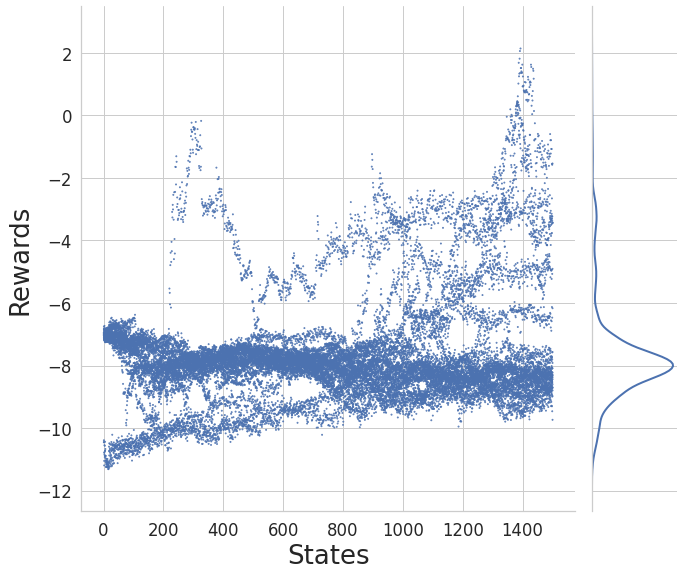

In [14]:
sns.reset_orig()
sns.set(font_scale = 1.5)
color = sns.color_palette()

sns.set_style(rc = {'axes.facecolor': '#FFFFFF'})
sns.set_style("whitegrid")

my_palette = sns.color_palette("pastel")


g = sns.JointGrid()
x, y = info_car2PPO_episode_1["state"], info_car2PPO_episode_1["reward"]
sns.scatterplot(x=x, y=y, ec="b", fc="none", s=0.5, linewidth=1.2, ax=g.ax_joint,palette=my_palette)
# sns.histplot(x=x, fill=False, linewidth=1, ax=g.ax_marg_x)
sns.kdeplot(y=y, linewidth=2, ax=g.ax_marg_y,palette=my_palette)



g.fig.set_figwidth(10)
g.fig.set_figheight(10)

# joint.fig.tight_layout()

g.ax_marg_x.remove()

g.set_axis_labels('States','Rewards',fontsize=26)
plt.tick_params(labelsize=32)
plt.savefig("RQ1_threeway_2.jpg", bbox_inches = "tight")


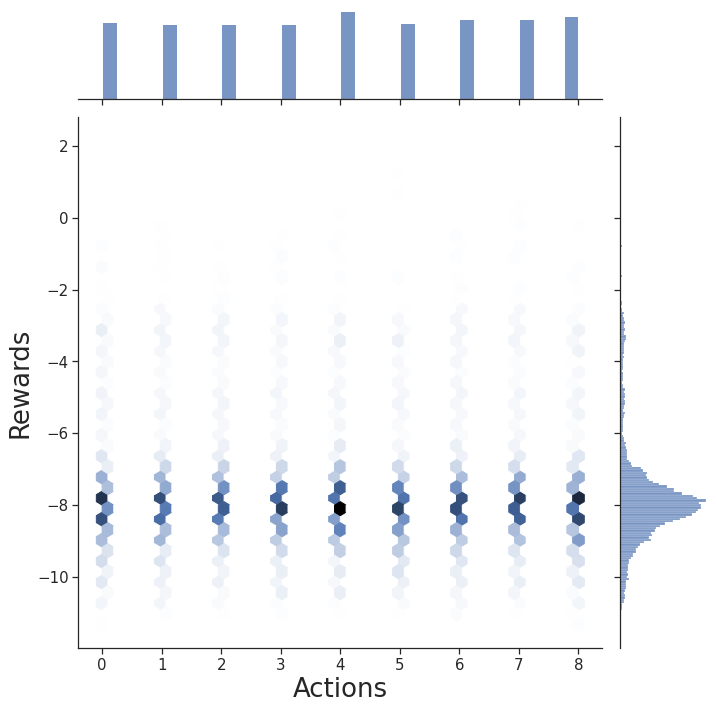

In [15]:



sns.reset_orig()

sns.set(font_scale = 1.36)
# sns.set_context("talk")

sns.set_style(rc = {'axes.facecolor': '#FFFFFF'})
sns.set_style("ticks")
# sns.set_style("whitegrid")

plot = sns.jointplot(data=info_car2PPO_episode_1, x="action", y="reward",height=10, kind="hex")

# g.set_axis_labels('States','Rewards',fontsize=26)

plot.set_axis_labels('Actions','Rewards',fontsize=26)
plt.savefig("RQ1_threeway_3.jpg", bbox_inches = "tight")


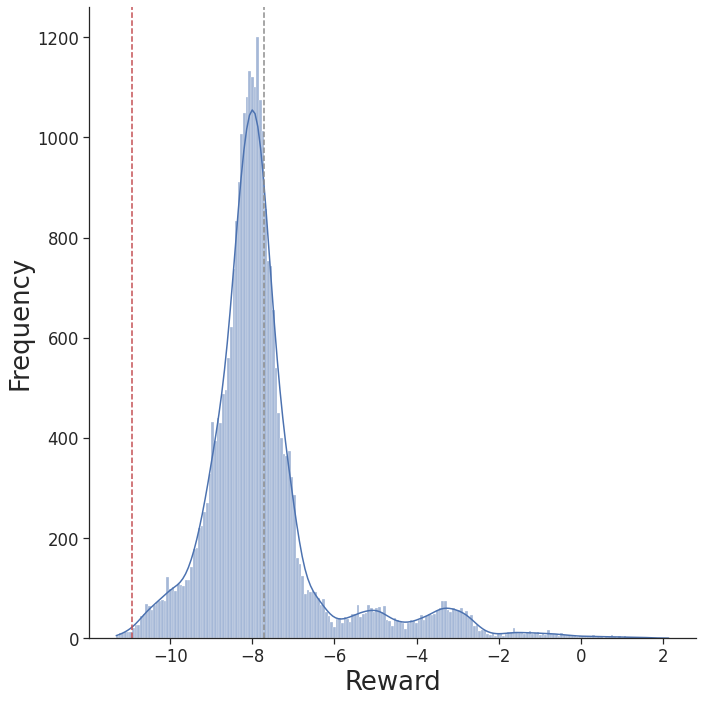

In [16]:

sns.reset_orig()
sns.set(font_scale = 1.5)

color = sns.color_palette()

sns.set_style(rc = {'axes.facecolor': '#FFFFFF'})
sns.set_style("ticks")
# sns.set_style("whitegrid")



plot =  sns.displot(data=info_car2PPO_episode_1, x="reward", kde=True,height=10,color=color[0])
plt.axvline(m, color=color[7], linestyle='dashed')
# plt.axvline(m+sd, color='y', linestyle='dashed')
# plt.axvline(m-sd, color='y', linestyle='dashed')

# plt.axvline(m + 2*sd, color='y', linestyle='dashed')
plt.axvline(m - 2*sd, color=color[3], linestyle='dashed')
plot.set_axis_labels('Reward','Frequency',fontsize=26)
plt.savefig("RQ1_threeway_4.jpg", bbox_inches = "tight")


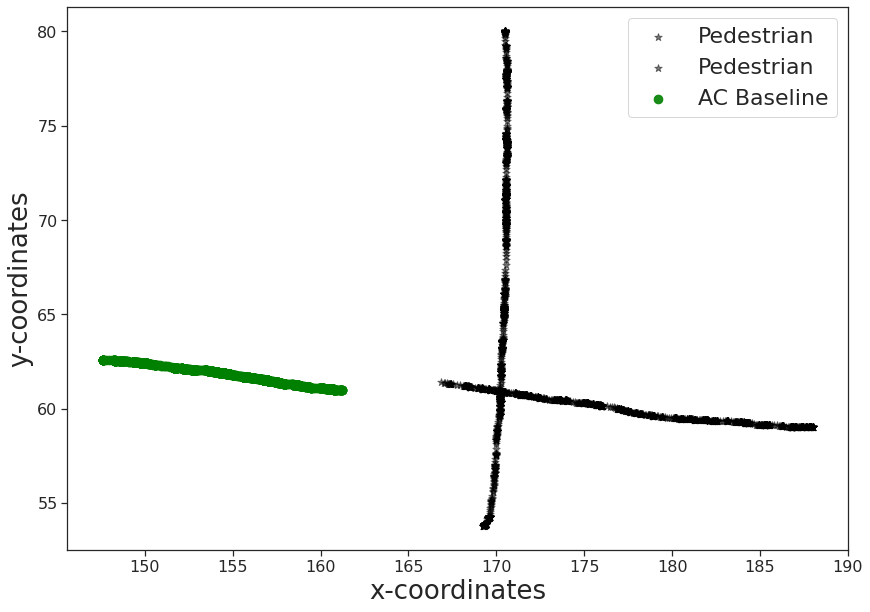

In [12]:

fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



# ax1.scatter(info_car1['x'][18001:19500], info_car1['y'][18001:19500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


ax1.scatter(info_car1['x'][3001:4500], info_car1['y'][3001:4500], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)
ax1.scatter(info_car2['x'][3001:4500],info_car2['y'][3001:4500], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)
ax1.scatter(info_car3['x'][3001:4500], info_car3['y'][3001:4500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


plt.legend(loc='upper right', fontsize=22)
plt.xlabel('x-coordinates', fontsize=26)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.ylabel('y-coordinates', fontsize=26)
plt.savefig("RQ3_threeway_1.pdf")


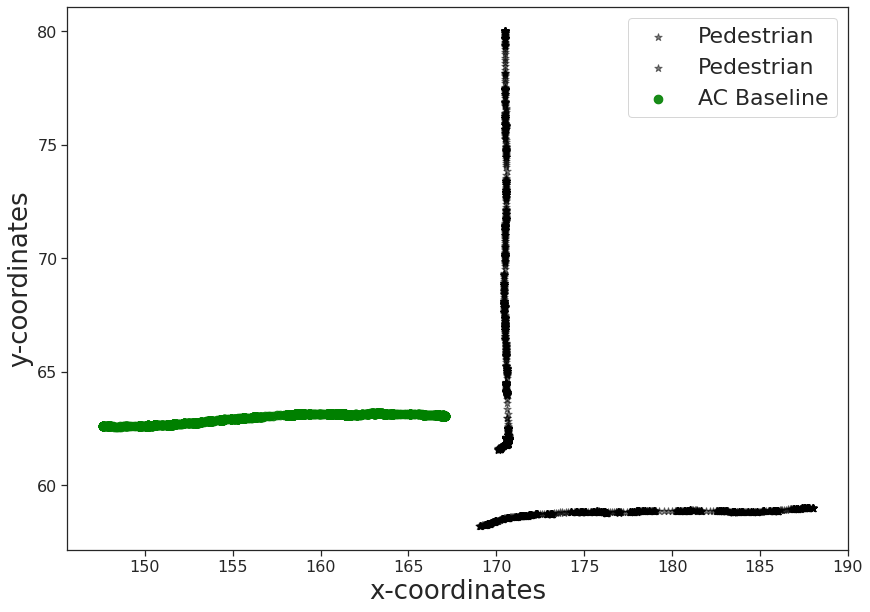

In [13]:

fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)





ax1.scatter(info_car1['x'][:1500], info_car1['y'][:1500], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)
ax1.scatter(info_car2['x'][:1500],info_car2['y'][:1500], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)
ax1.scatter(info_car3['x'][:1500], info_car3['y'][:1500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


plt.legend(loc='upper right', fontsize=22)
plt.xlabel('x-coordinates', fontsize=26)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.ylabel('y-coordinates', fontsize=26)
plt.savefig("RQ3_threeway_2.pdf")
